# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
url='https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'
df=pd.read_csv(url)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
obj=df.select_dtypes('object').columns
df[obj]=df[obj].astype('category')

In [39]:
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Se observa que no existen missing values ni parecerían existir valores atípicos a simple vista.

In [40]:
for i in df.select_dtypes('category'):
    print('')
    print('Categorias de ',i)
    print('')
    print(df[i].value_counts(normalize=True))


Categorias de  sex

male      0.505232
female    0.494768
Name: sex, dtype: float64

Categorias de  smoker

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

Categorias de  region

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64


Se observa que la muestra está equilibrada por sexo y región, pero no así por fumadores, hay mayor representación de fumadores. Este desbalance puede llevar a que el modelo no prediga correctamente el impacto de ser fumador en el costo del seguro.

In [41]:
X=df.drop(columns='charges')
y=df['charges']

Se divide la muestra entre entrenamiento y prueba considerando proporciones de 80-20.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [68]:
df_train=X_train.copy()
df_train['charge']=y_train

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 126 to 975
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1070 non-null   int64   
 1   sex       1070 non-null   category
 2   bmi       1070 non-null   float64 
 3   children  1070 non-null   int64   
 4   smoker    1070 non-null   category
 5   region    1070 non-null   category
 6   charge    1070 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 45.4 KB


Para seleccionar las variables a considerar se analiza la correlación lineal entre ellas.

In [51]:
df_train.corr()

,age,bmi,children,charge
age,1.000000,0.098839,0.023512,0.297439
bmi,0.098839,1.000000,0.014912,0.189630
children,0.023512,0.014912,1.000000,0.052584
charge,0.297439,0.189630,0.052584,1.000000


A primera vista la correlación entre las variables explicativas cuantitativas no evidencia existencia de multicolinealidad, siendo esta una buena señal. Al mismo tiempo, se observa que no existe una relación lineal alta entre dichas variables y la variable target. Sin embargo, interesa ver la relación lineal de cada feature cuando se distinguen grupos en función a las variables categóricas.

In [48]:
df_train.groupby('sex')[df_train.columns].corr()

age       bmi  children    charge
sex                                                    
female age       1.000000  0.069650  0.081279  0.309725
       bmi       0.069650  1.000000  0.028828  0.167060
       children  0.081279  0.028828  1.000000  0.061125
       charge    0.309725  0.167060  0.061125  1.000000
male   age       1.000000  0.129392 -0.032611  0.290097
       bmi       0.129392  1.000000 -0.000569  0.206190
       children -0.032611 -0.000569  1.000000  0.043991
       charge    0.290097  0.206190  0.043991  1.000000

In [49]:
df.groupby('smoker')[df.columns].corr()

age       bmi  children   charges
smoker                                                 
no     age       1.000000  0.122638  0.033395  0.627947
       bmi       0.122638  1.000000  0.019208  0.084037
       children  0.033395  0.019208  1.000000  0.138929
       charges   0.627947  0.084037  0.138929  1.000000
yes    age       1.000000  0.059674  0.081183  0.368224
       bmi       0.059674  1.000000 -0.012619  0.806481
       children  0.081183 -0.012619  1.000000  0.035945
       charges   0.368224  0.806481  0.035945  1.000000

In [50]:
df.groupby('region')[df.columns].corr()

age       bmi  children   charges
region                                                    
northeast age       1.000000  0.158684 -0.007530  0.300951
          bmi       0.158684  1.000000 -0.021209  0.231712
          children -0.007530 -0.021209  1.000000  0.067929
          charges   0.300951  0.231712  0.067929  1.000000
northwest age       1.000000  0.102804  0.063832  0.337654
          bmi       0.102804  1.000000  0.083024  0.181073
          children  0.063832  0.083024  1.000000  0.160382
          charges   0.337654  0.181073  0.160382  1.000000
southeast age       1.000000  0.019731  0.116481  0.310593
          bmi       0.019731  1.000000 -0.034462  0.142994
          children  0.116481 -0.034462  1.000000  0.046431
          charges   0.310593  0.142994  0.046431  1.000000
southwest age       1.000000  0.212355 -0.008655  0.258358
          bmi       0.212355  1.000000  0.065811  0.222928
          children -0.008655  0.065811  1.000000  0.028188
          charges   0.258358  0.222928  0.028188  1.000000

De lo anterior se observa que la correlación lineal con la variable objetivo varía entre grupos. Para algunos grupos son más relevantes algunas variables para determinar el cargo, mientras que para otras no. Por ejemplo, en el caso de los fumadores la variable 'bmi' parecería ser relevante para determinar el cargo, mientras que para los que no son fumadores, no lo es.

Como conlusión del análisis exploratorio, se decide considerar todas las variables como explicativas pero lo ideal sería plantear dos modelos lineales separando fumadores de no fumadores, en base a que la correlación lineal entre las variables explicativas y la variable objetivo difieren entre categorías. Sin embargo, dado que los datos son bastante pocos y si se dividen los grupos serían aún menos para entrenar y probar el modelo, se decide implementar el modelo para todos los datos.

Antes de plantear los modelos, es codificar las variables categóricas y escalar las continuas.

In [70]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test) # transformo también las variables para la prueba

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 126 to 975
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1070 non-null   int64  
 1   bmi               1070 non-null   float64
 2   children          1070 non-null   int64  
 3   sex_female        1070 non-null   uint8  
 4   sex_male          1070 non-null   uint8  
 5   smoker_no         1070 non-null   uint8  
 6   smoker_yes        1070 non-null   uint8  
 7   region_northeast  1070 non-null   uint8  
 8   region_northwest  1070 non-null   uint8  
 9   region_southeast  1070 non-null   uint8  
 10  region_southwest  1070 non-null   uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.8 KB


In [72]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 838 to 1002
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               268 non-null    int64  
 1   bmi               268 non-null    float64
 2   children          268 non-null    int64  
 3   sex_female        268 non-null    uint8  
 4   sex_male          268 non-null    uint8  
 5   smoker_no         268 non-null    uint8  
 6   smoker_yes        268 non-null    uint8  
 7   region_northeast  268 non-null    uint8  
 8   region_northwest  268 non-null    uint8  
 9   region_southeast  268 non-null    uint8  
 10  region_southwest  268 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 10.5 KB


In [74]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [77]:
from sklearn.linear_model import LinearRegression

In [85]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print('Intercepto:',lr.intercept_)
print('Coeficientes:',lr.coef_)

Intercepto: 13233.31398498337
Coeficientes: [ 3.56150769e+03  2.13467039e+03  5.59847291e+02 -2.47576503e+13
 -2.47576503e+13 -2.08397180e+17 -2.08397180e+17 -2.70612739e+16
 -2.74491850e+16 -2.84628795e+16 -2.67656504e+16]


In [92]:
y_pred=lr.predict(X_test)
y_pred[:10]

array([ 5735.31398498, 30231.31398498,  6071.31398498,  3475.31398498,
        8147.31398498,  1665.31398498, 34891.31398498,  2487.31398498,
       14439.31398498, 15169.31398498])

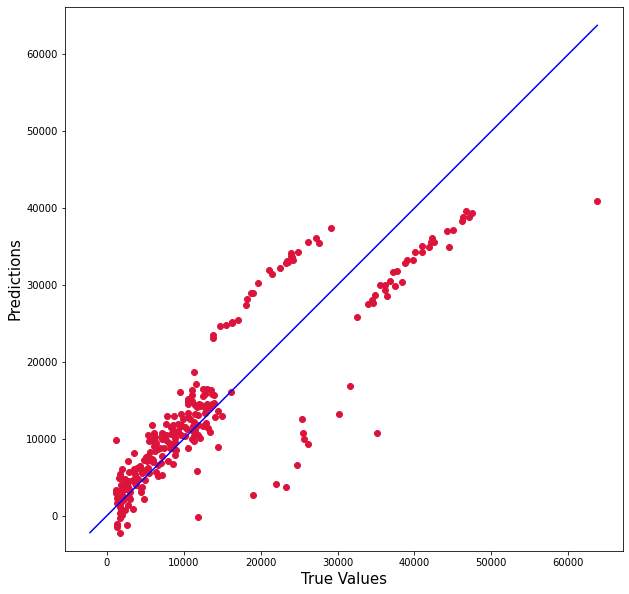

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


In [111]:
lr.coef_
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [113]:
# Resultados
print("R^2: %.6f\t" % lr.score(X_train, y_train)) #\t : tabulador

#Calcular el error
print('\nMean squared error\t: %.6f' % mean_squared_error(y_test, y_pred))
print('Coeff. of determination\t: %.6f' % r2_score(y_test, y_pred))

R^2: 0.744150	

Mean squared error	: 34473421.511177
Coeff. of determination	: 0.774571
